In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MC_Fake_dataset_predictions.csv')

In [3]:
df.sample(10)

,text,true_label,predicted_label
9188,Christian Siriano dressed 17 celebrities and c...,1,1
6321,They may have had the sassiest relationship on...,1,0
18293,"The country now has more than 50,000 confirmed...",1,1
19857,SEOUL (AFP) Two South Korean apartment buildin...,1,1
28069,Letters To the Editor: Re Lessons From the Tea...,1,1
1378,Amid the numerous reports of events in Ukraine...,1,1
20049,Prince Harry and Meghan Markle are joining for...,1,0
12902,Heidi Klum and her boyfriend of three years Vi...,1,1
12518,The family matriarch shared what she's gratefu...,1,0
20173,"Jasmine, aged 18, is explaining what it's like...",1,1


In [4]:
# calculate accuracy, precision, f1-score and recall from true_label and predicted_label
def calculate_metrics(df):
    TP = len(df[(df['true_label'] == 1) & (df['predicted_label'] == 1)])
    TN = len(df[(df['true_label'] == 0) & (df['predicted_label'] == 0)])
    FP = len(df[(df['true_label'] == 0) & (df['predicted_label'] == 1)])
    FN = len(df[(df['true_label'] == 1) & (df['predicted_label'] == 0)])

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score
# calculate metrics for the entire dataset
accuracy, precision, recall, f1_score = calculate_metrics(df)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")


Accuracy: 0.7471652507731135
Precision: 0.910360827286638
Recall: 0.7768744734625105
F1-Score: 0.8383372349371576


In [6]:
def calculate_metrics_0(df):
    TP = len(df[(df['true_label'] == 0) & (df['predicted_label'] == 0)])
    TN = len(df[(df['true_label'] == 1) & (df['predicted_label'] == 1)])
    FP = len(df[(df['true_label'] == 1) & (df['predicted_label'] == 0)])
    FN = len(df[(df['true_label'] == 0) & (df['predicted_label'] == 1)])

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score
# calculate metrics for the entire dataset
accuracy, precision, recall, f1_score = calculate_metrics_0(df)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.7471652507731135
Precision: 0.32727965455930913
Recall: 0.5866150694286365
F1-Score: 0.42015162631450237


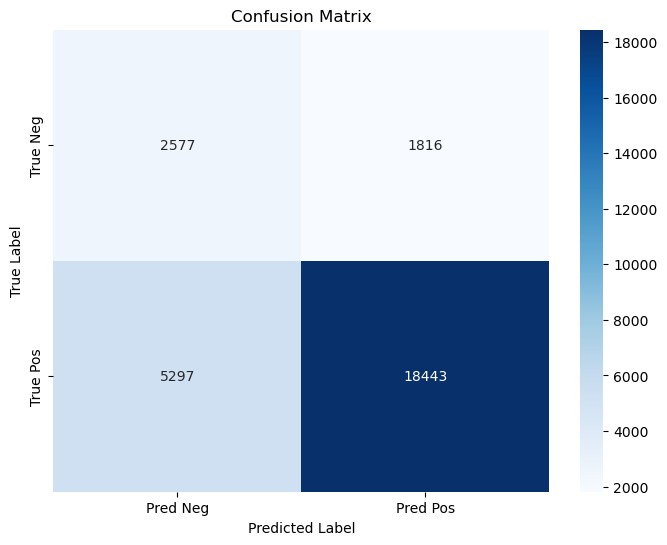

In [5]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(df['true_label'], df['predicted_label'])
cm_df = pd.DataFrame(cm, index=['True Neg', 'True Pos'], columns=['Pred Neg', 'Pred Pos'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()